In [1]:
import numpy as np
import matplotlib.pyplot as plt

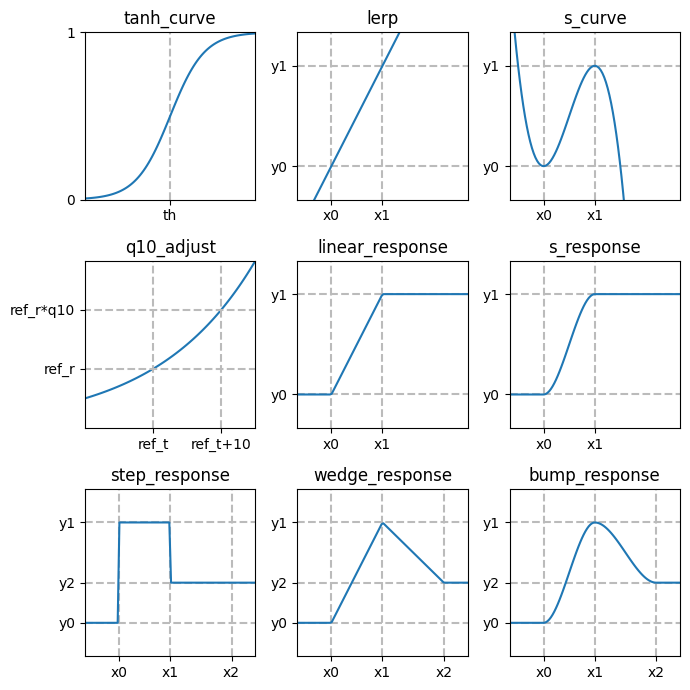

In [53]:
def lerp(x, x0, x1, y0, y1) :
    t = (x-x0)/(x1-x0)
    return (1-t)*y0 + t*y1

def s_curve(x, x0, x1, y0, y1) :
    t = (x-x0)/(x1-x0)
    tt = (3-2*t)*t*t
    return (1-tt)*y0 + tt*y1

def tanh_curve(x, th) :
    return 0.5*(1 + np.tanh(x - th))

def q10_adjust(ref_rate, ref_temp, temp, q10) :
    return ref_rate * q10**((temp-ref_temp)/10)

def linear_response(x, x0, x1, y0, y1) :
    if x <= x0 : return y0
    if x >= x1 : return y1
    return lerp(x, x0, x1, y0, y1)

def s_response(x, x0, x1, y0, y1) :
    if x <= x0 : return y0
    if x >= x1 : return y1
    return s_curve(x, x0, x1, y0, y1)

def step_response(x, x0, x1, y0, y1, y2) :
    if x <= x0 : return y0
    if x <= x1 : return y1
    return y2

def wedge_response(x, x0, x1, x2, y0, y1, y2) :
    if x <= x0 : return y0
    if x >= x2 : return y2
    if x <= x1 : return lerp(x, x0, x1, y0, y1)
    return lerp(x, x1, x2, y1, y2)

def bump_response(x, x0, x1, x2, y0, y1, y2) :
    if x <= x0 : return y0
    if x >= x2 : return y2
    if x <= x1 : return s_curve(x, x0, x1, y0, y1)
    return s_curve(x, x1, x2, y1, y2)
    
fig, axs = plt.subplots(3, 3, figsize=(7, 7))

xmax = 5
ymax = 2.5

xs = np.linspace(0, xmax, 100)

x0 = 1
x1 = 2.5
x2 = 4.3
y0 = 0.5
y1 = 2
y2 = 1.1

linecol = '#bbbbbb'

def fix_lines(ax, xs, xlb, ys, ylb, xmx=xmax, ymx=ymax) :
    for x in xs :
        ax.plot([x, x], [0, ymx], linestyle='--', color=linecol)
    for y in ys :
        ax.plot([0, xmx], [y, y], linestyle='--', color=linecol)

    ax.set_xticks(xs, labels=xlb)
    ax.set_yticks(ys, labels=ylb)

def fix_axes(ax, title, all_labels = False) :    
    xs = [x0, x1, x2]
    xlb = ['x0', 'x1', 'x2']
    ys = [y0, y1, y2]
    ylb = ['y0', 'y1', 'y2']
    if not all_labels :
        for a in [xs, xlb, ys, ylb] : a.pop()

    fix_lines(ax, xs, xlb, ys, ylb)
    
    ax.set_ylim(0, ymax)
    ax.set_xlim(0, xmax)
    
    ax.set_title(title)

fix_axes(axs[0, 1], 'lerp')
ys = lerp(xs, x0, x1, y0, y1)
axs[0, 1].plot(xs, ys)

fix_axes(axs[0, 2], 's_curve')
ys = s_curve(xs, x0, x1, y0, y1)
axs[0, 2].plot(xs, ys)

#axs[1, 0].axis('off')

fix_axes(axs[1, 1], 'linear_response')
#ys = np.vectorize(linear_response)(xs, x0, x1, y0, y1)
ys = [linear_response(x, x0, x1, y0, y1) for x in xs]
axs[1, 1].plot(xs, ys)

fix_axes(axs[1, 2], 's_response')
ys = [s_response(x, x0, x1, y0, y1) for x in xs]
axs[1, 2].plot(xs, ys)

fix_axes(axs[2, 0], 'step_response', True)
ys = [step_response(x, x0, x1, y0, y1, y2) for x in xs]
axs[2, 0].plot(xs, ys)

fix_axes(axs[2, 1], 'wedge_response', True)
ys = [wedge_response(x, x0, x1, x2, y0, y1, y2) for x in xs]
axs[2, 1].plot(xs, ys)

fix_axes(axs[2, 2], 'bump_response', True)
ys = [bump_response(x, x0, x1, x2, y0, y1, y2) for x in xs]
axs[2, 2].plot(xs, ys)

ax = axs[0, 0]
ax.set_title('tanh_curve')
ax.set_xlim(0, xmax)
ax.set_ylim(0, 1)
ax.set_xticks([x1], labels=['th'])
ax.set_yticks([0, 1])
ax.plot([x1, x1], [0, ymax], linestyle='--', color=linecol)
ys = tanh_curve(xs, x1)
axs[0, 0].plot(xs, ys)


ref_temp = 20
q10 = 2
ref_rate = 1
temp = np.linspace(10, 35, 100)
ax = axs[1, 0]
ax.set_title('q10_adjust')
ys = q10_adjust(ref_rate, ref_temp, temp, q10)
ax.set_xlim(temp[0], temp[-1])
ax.set_ylim(0, ys[-1])
ax.plot(temp, ys)
fix_lines(ax, [ref_temp, ref_temp+10], ['ref_t', 'ref_t+10'], [ref_rate, ref_rate*q10], ['ref_r', 'ref_r*q10'], temp[-1], ys[-1])

fig.tight_layout()

fig.savefig('response_functions.png')